In [107]:
from keras.datasets import imdb
import numpy as np
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [108]:
len(train_data[0])

218

In [109]:
train_labels[24997]

0

In [110]:
max([max(sequence) for sequence in train_data])


9999

Decoding the review back to English

In [111]:
word_index=imdb.get_word_index()


In [112]:
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
len(reverse_word_index)


88584

In [113]:
decoded_review=''.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [114]:
decoded_review

"?thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert?isanamazingactorandnowthesamebeingdirector?fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor?andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso?tothetwolittleboy'sthatplayedthe?ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe?listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall"

Encoding integer into a binary matrix

In [115]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results


In [116]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [117]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [118]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorzing train and test label

In [119]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [120]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

Building Model 

In [121]:
from keras import models
from keras import layers

In [122]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Compiling Model

In [123]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [124]:
from keras import optimizers

In [125]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [126]:
from keras import losses
from keras import metrics


In [127]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

Validation approach

In [128]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

Training Model

In [129]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5249 - acc: 0.7839 - val_loss: 0.3964 - val_acc: 0.8642
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3120 - acc: 0.9017 - val_loss: 0.3230 - val_acc: 0.8740
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2257 - acc: 0.9277 - val_loss: 0.3036 - val_acc: 0.8782
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1783 - acc: 0.9426 - val_loss: 0.2768 - val_acc: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1468 - acc: 0.9523 - val_loss: 0.2797 - val_acc: 0.8902
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1164 - acc: 0.9645 - val_loss: 0.3046 - val_acc: 0.8816
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0993 - acc: 0.9716 - val_loss: 0.3189 - val_acc: 0.8836
Epoch 8/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0806 - a

In [130]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Plotting the training  and validation loss

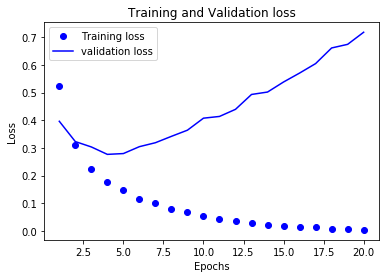

In [131]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(history_dict['acc']) +1)
plt.plot(epochs,loss_values,'bo', label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Plotting training and validation accuracy

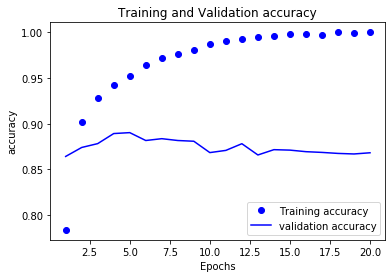

In [132]:
plt.clf()
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
epochs=range(1,len(history_dict['acc']) +1)
plt.plot(epochs,acc_values,'bo', label='Training accuracy')
plt.plot(epochs,val_acc_values,'b',label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Retraining a model from scratch

In [133]:
model=models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4543 - accuracy: 0.8224
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2645 - accuracy: 0.9082
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2038 - accuracy: 0.9285
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2886 - accuracy: 0.8850


In [134]:
model.predict(x_test)

array([[0.20338807],
       [0.9998841 ],
       [0.893543  ],
       ...,
       [0.0969319 ],
       [0.08597425],
       [0.62181014]], dtype=float32)